## <span style="color:lightpink">2.2.2 성능 지표 선택 </span>

**성능 측정 지표**

$$\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum^{m}_{i=1}{\left( h \left(\mathbf{x}^{(i)} \right) - y^{(i)} \right)^{2}}}$$

$$\text{MAE}(\mathbf{X}, h)=\frac{1}{m}\sum_{i=1}^{m}\left| h(\mathbf{x}^{(i)}) - y^{(i)} \right|$$

# <span style="color:deepskyblue">2.3 데이터 가져오기 </span>    
---

## <span style="color:lightpink">2.3.2 데이터 다운로드 </span>  

In [1]:
import os
import glob
import pandas as pd
import tarfile
import urllib.request
import numpy as np

## downloads a zipped tar file (.tar.gz) that contains several CSV files, 
## from a public website. 
def download_and_merge_csv(url: str ,output_csv: str):

    # Open for reading with gzip compression.
    # Extract all members from the archive to the current working directory or directory path. 
    with urllib.request.urlopen(url) as res:
        tarfile.open(fileobj=res, mode="r|gz").extractall()
    
    # concatenate all extracted csv files
    df = pd.concat(
        [pd.read_csv(csv_file, header=None) 
         for csv_file in glob.glob('*.csv')])
    
    # export a DataFrame to a csv file
    df.to_csv(output_csv, index=False, header=False)

In [2]:
download_and_merge_csv(
    url='https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz', 
    output_csv='housing.csv')

## <span style="color:lightpink">2.3.3 데이터 구조 훑어보기 </span>  

In [3]:
housing=pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


데이터셋에 20,640개의 샘플이 들어 있음  
total_bedrooms은 na값이 존재함  

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


데이터의 형태를 빠르게 검토하는 방법은 히스토그램을 그려보는 것

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

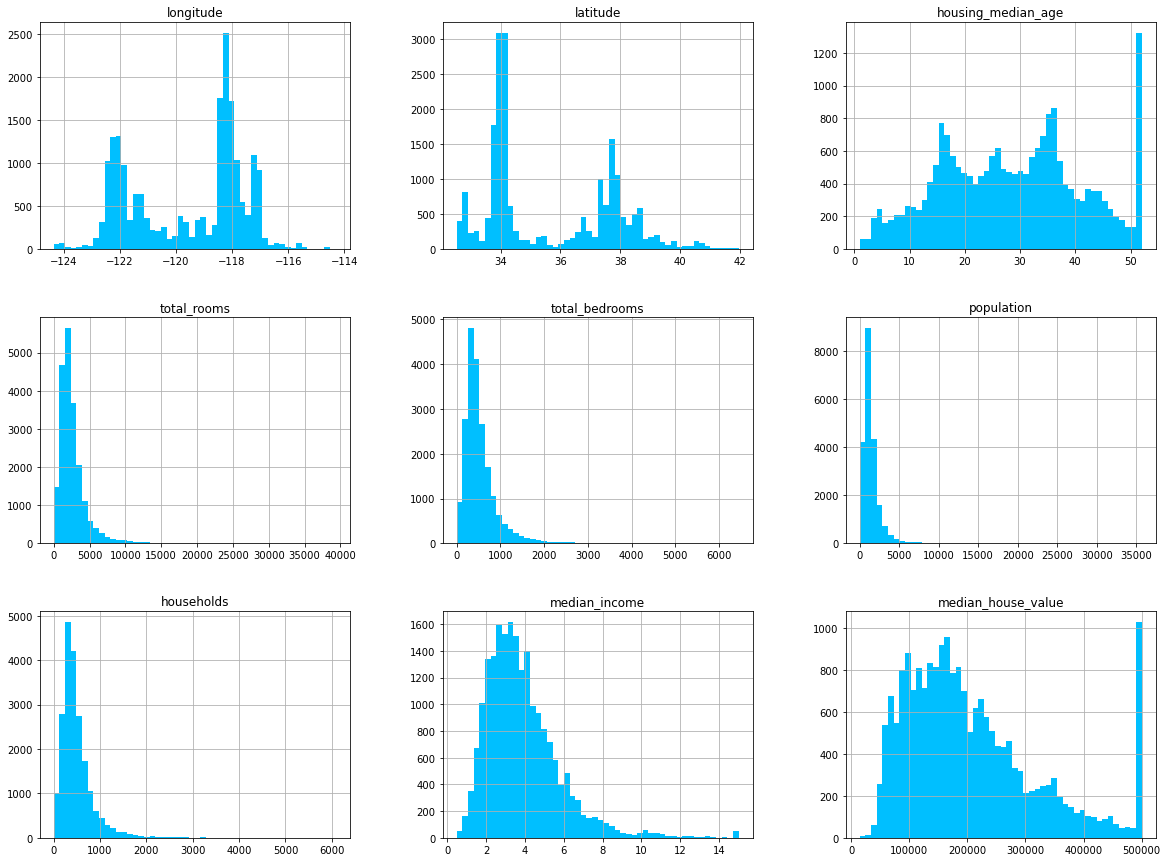

In [8]:
housing.hist(bins=50,figsize=(20,15),color='deepskyblue')
plt.show()

- 중간 소득 특성이 US달러로 표현되어 있지 않음  
   스케일을 조정하고 상한이 15, 하한이 0.5가 되도록 만들었음  
   대략 수만 달러 (ex: 3 $\rightarrow$ 30,000달러)  
- 중간 주택 연도와 가격 역시 최댓값과 최솟값으로 함  
- 주택 가격은 타깃 속성으로 사용하기 때문에 만약 500,000이 넘어가도 정확한 예측이 필요하다면 상한값 밖의 구역에 대해 정확한 레이블을 구하거나 이런 구역을 제거  
- 꼬리가 두꺼움
- 스케일이 다 다름

## <span style="color:lightpink">2.3.4 test set 만들기 </span> 

1) np.random.permutaion을 이용해 Train/Test set 나누기

In [9]:
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [11]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


2) zlib의 crc32를 이용한 Train/Test set 나누기

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = housing.reset_index()  # 'index'열이 추가된 df가 반환됨
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [14]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


3) sklearn의 train_test_split을 이용한 Train/Test set 나누기

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


4) sklearn의 StratifiedShuffleSplit을 이용한 Train/Test set 나누기

Train/Test set이 각 데이터를 대표할 수 있도록 고르게 샘플링 되기 위해서 계층적 샘플링(stratified sampling) 을 사용할 수 있다. 계층적 샘플링은 전체 모수를 계층으로 나눠 각 계층마다 샘플링을 하는 방법을 말한다.

캘리포니아 주택가격 데이터셋에서는 Train/Test set을 `median_income`을 기준으로 계층적 샘플링을 통해 Train/Test set을 나눈다.

중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야 함  
1.5-6에 모여 있고 일부는 6을 넘김

<AxesSubplot:>

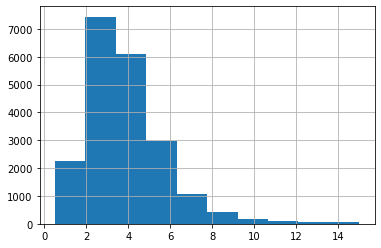

In [17]:
housing["median_income"].hist()

In [18]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [19]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

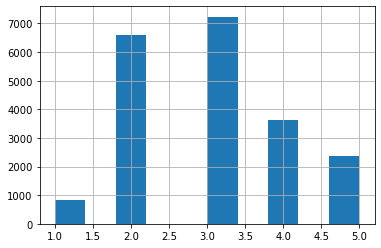

In [20]:
housing["income_cat"].hist()

계층 샘플링

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

테스트 세트에서 소득 카테고리의 비율

In [22]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

전체에서 소득 카테고리의 비율

In [23]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [24]:
# 삭제
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)